# Обработка изображений
### Содержание
 1. [Цветовая обработка. Изменение цветовой температуры](#color_processing)<br>
 2. [Фильтрация. Увеличение резкости](#filtering)

### 1. Цветовая обработка. Изменение цветовой температуры <a name="color_processing"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal

Загрузим изображение и преобразуем в float32 [0,1]

In [2]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255

Функция вывода изображения на экран

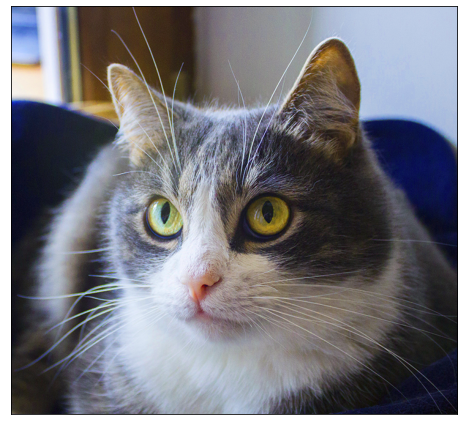

In [3]:
def show_image(im, size=(8, 8)):
    plt.figure(figsize=size)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im)
    plt.show()

show_image(img)

Вспомогательная функция преобразования цветовой температуры в цвет RGB. Для этого есть и готовые функции. 

In [4]:
def kelvin2rgb(t):
    t /= 100.
    
    # Считаем значения цветовых каналов
    r = 329.69 * ((t - 60) ** -0.13) if t > 66 else 255
    g = 288.12 * ((t - 60) ** -0.07) if t > 66 else 99.47 * np.log(t) - 161.12
    b = 138.52 * np.log(t - 10) - 305.04 if t > 19 else 0

    rgb = np.array([r, g, b], dtype=np.float32)
    for i in range(rgb.shape[0]):
        if rgb[i] < 0:
            rgb[i] = 0
        elif rgb[i] > 255:
            rgb[i] = 255
    
    return rgb / 255

Выведем шкалу цветовой температуры, на основе результатов выполнения функции `kelvin2rgb`. 

Единица измерения - Кельвины (k).

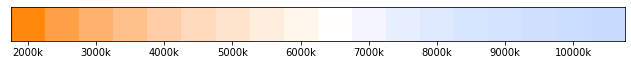

In [5]:
im = [[kelvin2rgb(t) for t in range(2000, 11000, 500)]]
plt.figure(figsize=(11, 1))
plt.xticks(range(0, 18, 2), [f'{i}k' for i in range(2000, 11000, 1000)])
plt.yticks([])
plt.imshow(im)
plt.show()

Чем меньше температура, тем теплее цвет.

Попробуем изменить цветовую температуру у нашего изображения.

Считаем по-умолчанию, что картинки 6600k температура примерно, что равняется почти белому цвету.

Сначала сделаем потеплее, изменим температуру на 4500k

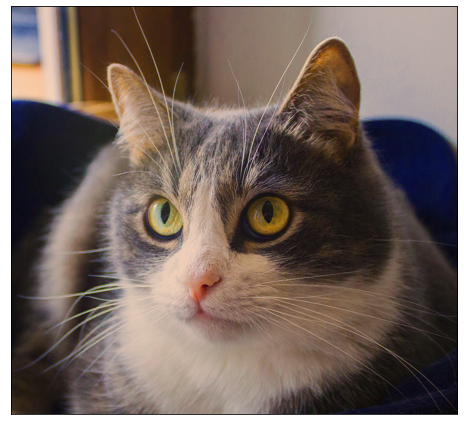

In [6]:
show_image(img * kelvin2rgb(4500))

Теперь холоднее. 9500k

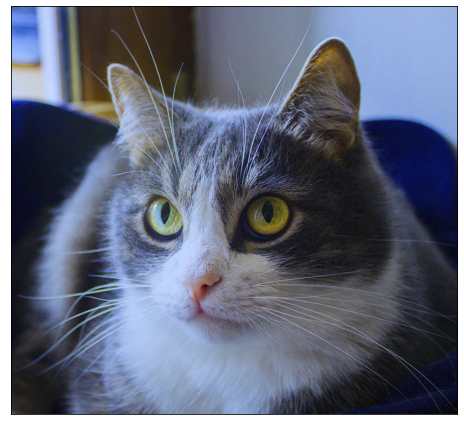

In [7]:
show_image(img * kelvin2rgb(9500))

### 2. Фильтрация. Увеличение резкости <a name="filtering"></a>
Сделаем фильтр, который грубо увеличивает резкость изображения.

Для начала напишем пару функций.

Функция отображения фильтра.

In [8]:
def show_filter(filter):
    plt.imshow(filter, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    for i in range(3):
        for j in range(3):
            text = plt.text(j, i, filter[i, j], ha='center', va='center', color='r')
    plt.show()

Функция фильтрации изображения. 

На вход подаем изображение для обработки и фильтр. 

На выходе получаем изображение, полученное в результате фильтрации.

In [9]:
def filtering(image, kernel):
    new_resolution = np.array(image.shape[:2]) - np.array(kernel.shape) + 1
    out_img = np.zeros((*new_resolution, 3), dtype=np.float32)
    for x in range(out_img.shape[0]):
        for y in range(out_img.shape[1]):
            for c in range(3):
                box = image[x:x+kernel.shape[0], 
                            y:y+kernel.shape[1], 
                            c]
                out_img[x, y, c] = np.sum(kernel * box)
                
                if out_img[x, y, c] < 0:
                    out_img[x, y, c] = 0
                elif out_img[x, y, c] > 1:
                    out_img[x, y, c] = 1
    return out_img

Строим наш фильтр

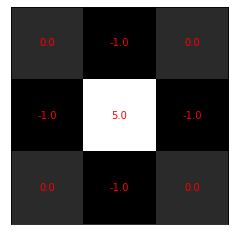

In [10]:
w = np.array([[ 0, -1,  0],
              [-1,  5, -1],
              [ 0, -1,  0]], dtype=np.float32)

show_filter(w)

Вспомним, как выглядит исходное изображение

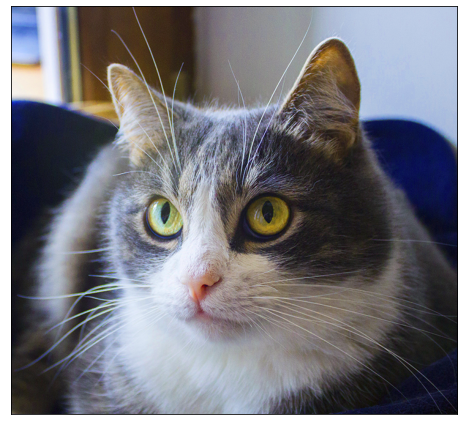

In [11]:
show_image(img)

Выводим результат фильтрации.

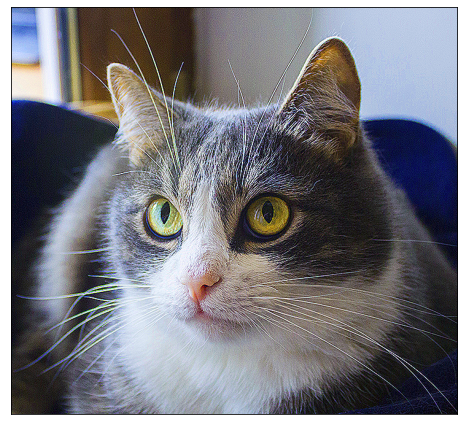

CPU times: user 33 s, sys: 25.6 ms, total: 33 s
Wall time: 33 s


In [12]:
%%time
show_image(filtering(img, w))

Изображение стало резче.

Напоследок, сделаем то же самое, используя `scipy.signal.correlate2d`

In [13]:
%%time
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:, :, c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 123 ms, sys: 7 µs, total: 123 ms
Wall time: 143 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


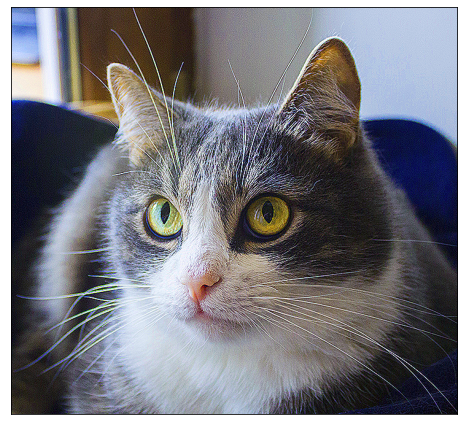

In [14]:
show_image(out_img)